In [1]:
import numpy as np
from likelihood_test import Likelihood
import matplotlib.pyplot as plt

import emcee


In [2]:
lhood = Likelihood()
fidparam = np.array([0, 0, 0, 0, 0, 0, 0 ,0])
symbols = ['$x1$', '$x2$','$x3$', '$x4$', '$x5$', '$x6$','$x7$', '$x8$']

In [3]:
lhood.logp(fidparam)

0.0

In [4]:
px1 = lambda x : np.exp(lhood.logp(np.array([x, 0, 0, 0, 0, 0, 0 ,0])))

In [5]:
xspace = np.linspace(-5, 5, 50)
posterior = []
for i in xspace:
    posterior.append(px1(i))

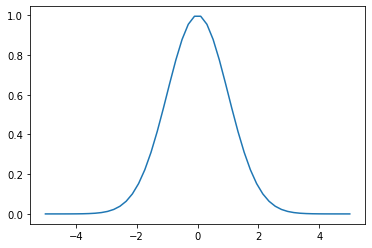

In [6]:
plt.plot(xspace, posterior)

In [7]:
ndim, nwalkers = 8, 100

In [8]:
x1 = np.random.uniform(0.51, 0.52, nwalkers)
x2 = np.random.uniform(-0.22, -0.21, nwalkers)
x3 = np.random.uniform(0.58, 0.59, nwalkers)
x4 = np.random.uniform(-0.12, -0.11, nwalkers)
x5 = np.random.uniform(0.61, 0.62, nwalkers)
x6 = np.random.uniform(-0.72, -0.71, nwalkers)
x7 = np.random.uniform(0.01, 0.02, nwalkers)
x8 = np.random.uniform(-0.92, -0.91, nwalkers)

In [9]:
p0 = np.transpose(np.vstack([x1, x2, x3, x4, x5, x6, x7, x8]))

In [10]:
p0.shape

(100, 8)

In [11]:
filename = "mcmc_data.h5"
backend = emcee.backends.HDFBackend(filename)
backend.reset(nwalkers, ndim)

In [12]:
move = emcee.moves.StretchMove(1.8)

In [13]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lhood.logp, moves=move, backend=backend)
sampler.run_mcmc(p0, 1000)

State([[-2.51835184e+00 -5.02537752e-01 -2.62579588e-01  1.50974582e+00
  -2.08646253e+00 -1.44928574e+00 -9.56504408e-01 -3.22123474e-01]
 [ 8.00259002e-01  3.86340774e-01  3.40307314e-01  1.89409305e+00
   1.37019377e+00  4.26133210e-01 -8.62166768e-01 -6.08874185e-01]
 [-4.31368510e-01 -8.95963338e-01 -9.32159365e-01  3.19660845e-02
  -8.82617249e-01  5.56476935e-01  1.54840136e+00 -6.31047487e-01]
 [-8.95627184e-01 -8.57042360e-01 -4.17214268e-01  3.33461406e-01
  -2.30881824e+00  2.36724767e+00  8.24932079e-01  6.45582902e-01]
 [-1.22707413e+00 -8.48724050e-03 -1.23718935e-01 -3.69920806e-01
   6.79629899e-01  7.27569236e-01  3.83669660e-01  1.13889185e+00]
 [ 2.92513841e-01  8.94700037e-02 -4.76679779e-01  6.77806566e-01
   9.53660450e-01  5.54251555e-01 -8.74617435e-02 -1.32231513e+00]
 [ 9.83379994e-01 -2.16671407e-03  1.38506611e+00  9.69344648e-01
  -1.45756250e+00 -4.03245744e-01  3.50197622e-01  5.43580493e-01]
 [ 1.15005573e+00 -3.30692451e-01  2.85194527e-01 -1.04938766e-

In [14]:
samples = sampler.get_chain(flat=True)

In [15]:
print(
    "Mean acceptance fraction: {0:.3f}".format(
        np.mean(sampler.acceptance_fraction)
    )
)

Mean acceptance fraction: 0.521
